# Importing modules:

In [250]:
import pandas as pd
import matplotlib.pyplot as plt

# importing csv file

In [154]:
restaurant_df=pd.read_csv("Resources/CSV_file")

# Data Cleaning

In [155]:
result_df=restaurant_df[["name","stars","price","cuisine"]]


In [156]:
rating = result_df["stars"].replace("star rating","", regex=True)

In [157]:
result_df["star rating"]=rating

In [158]:
price=result_df["price"].replace("$$", 2)
result_df["price"]=price


In [159]:
price_2=result_df["price"].replace("$",1)
result_df["price"]=price_2

In [160]:
price_3=result_df["price"].replace("$$$",3)
result_df["price"]=price_3

In [161]:
price_4=result_df["price"].replace("$$$$",4)
result_df["price"]=price_4

In [162]:
result_df['rating'] = result_df['star rating'].astype(float)


In [309]:
result_df_2 = result_df[["name", "price", "cuisine", "rating"]]
result_df_2.to_csv("Resources/clean_csv_file")

# making bar graph for the most populated cuisines

In [251]:
cuisine_saturation=result_df.groupby(["cuisine"]).count()["name"]
cuisine_df=pd.DataFrame({"number":cuisine_saturation})
cuisine_df_2=cuisine_df.sort_values("number", ascending= False)

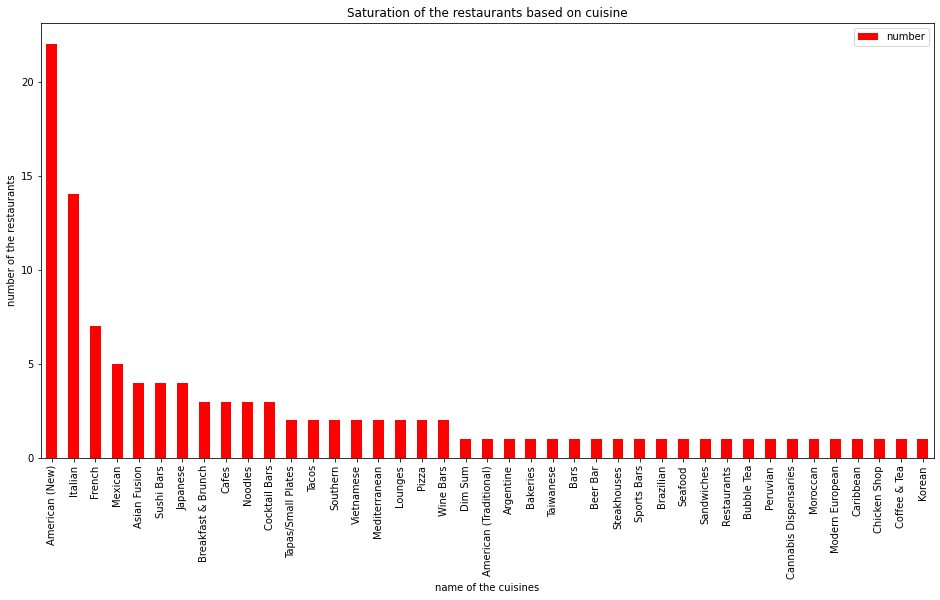

<Figure size 1152x576 with 0 Axes>

In [252]:
cuisine_df_2.plot(kind="bar", 
                  figsize=(16,8), 
                  color = "red", 
                  xlabel="name of the cuisines",
                  ylabel="number of the restaurants",
                  title="Saturation of the restaurants based on cuisine")
plt.show()
plt.savefig("Resources/cuisine_saturation.png")


# Find the pricing Range for different cuisines

In [254]:
price=result_df.groupby(["cuisine"]).mean()["price"].round(0)
price_df=pd.DataFrame({"Average Price":price})
price_df_2=price_df.sort_values("Average Price", ascending= False).dropna()


In [255]:
plt.rcParams["figure.figsize"] = (16,8)

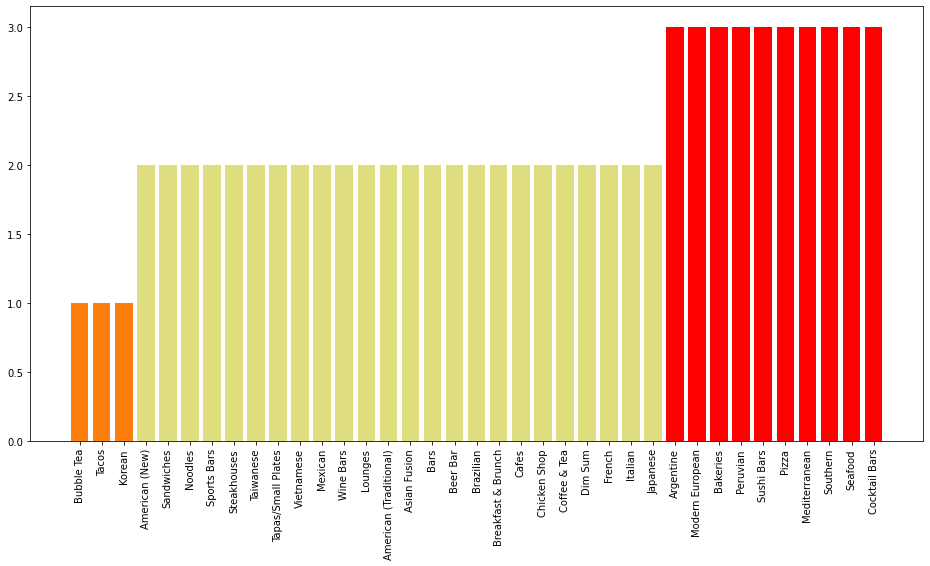

<Figure size 1152x576 with 0 Axes>

In [256]:
t1 = price_df_2[price_df_2["Average Price"]<2]
t2=price_df_2[price_df_2["Average Price"]==2]
t3= price_df_2[price_df_2["Average Price"]>2]
plt.bar(t1.index.values, t1['Average Price'], color='tab:orange')
plt.bar(t2.index.values, t2['Average Price'], color='y', alpha= 0.5)
plt.bar(t3.index.values, t3['Average Price'], color='r')
plt.xticks(rotation = 90)
plt.show()
plt.savefig("Resources/price.png")

# Correlation between pricing and rating

In [273]:
price=result_df.groupby(["cuisine"]).mean()["price"].round(0)
rating=result_df.groupby(["cuisine"]).mean()["rating"].round(0)
correlation_df=pd.DataFrame({"Average Price":price,
                    "Average Rating":rating})
correlation_df_2=correlation_df.sort_values("Average Price", ascending= False).dropna()

In [274]:
expensive=correlation_df_2["Average Price"].replace(3.0, "expensive")
correlation_df_2["Average Price"]= expensive

In [275]:
medium=correlation_df_2["Average Price"].replace(2.0, "medium")
correlation_df_2["Average Price"]= medium

In [314]:
cheap=correlation_df_2["Average Price"].replace(1.0, "cheap")
correlation_df_2["Average Price"]= cheap


In [315]:
correlation=correlation_df_2.groupby(["Average Price"]).mean()["Average Rating"]
correlation_df_3 = pd.DataFrame({
                                "Average Rating" : correlation
})

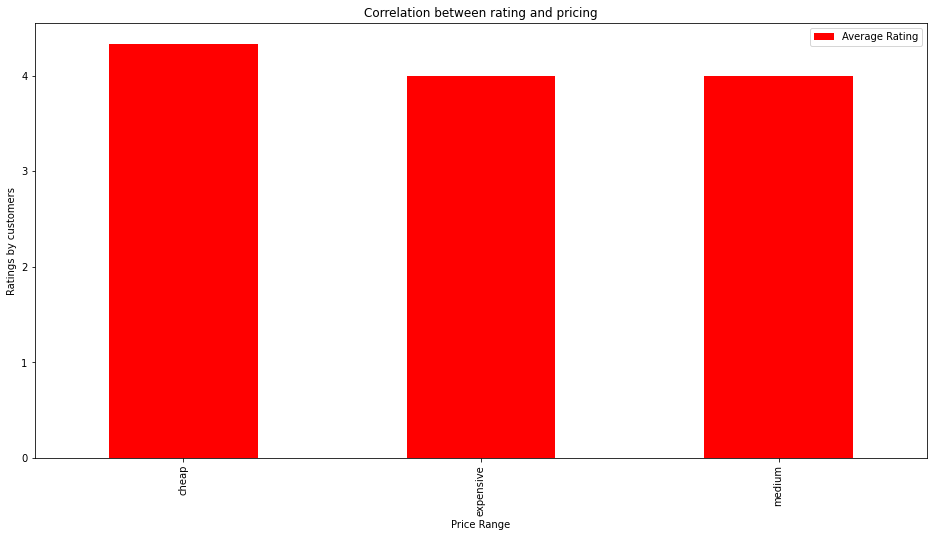

<Figure size 1152x576 with 0 Axes>

In [316]:
correlation_df_3.plot(kind="bar", 
                      color= "r", 
                      xlabel = "Price Range", 
                      ylabel = "Ratings by customers", 
                      title="Correlation between rating and pricing")
plt.show()
plt.savefig("Resources/correlation.png")

# Analyzing Data

In [317]:
comparison=correlation_df_2.reset_index()
comparison_data = comparison.groupby(["Average Price"]).count()["cuisine"]

In [318]:
comparison_df = pd.DataFrame({"number of restaurants":comparison_data})

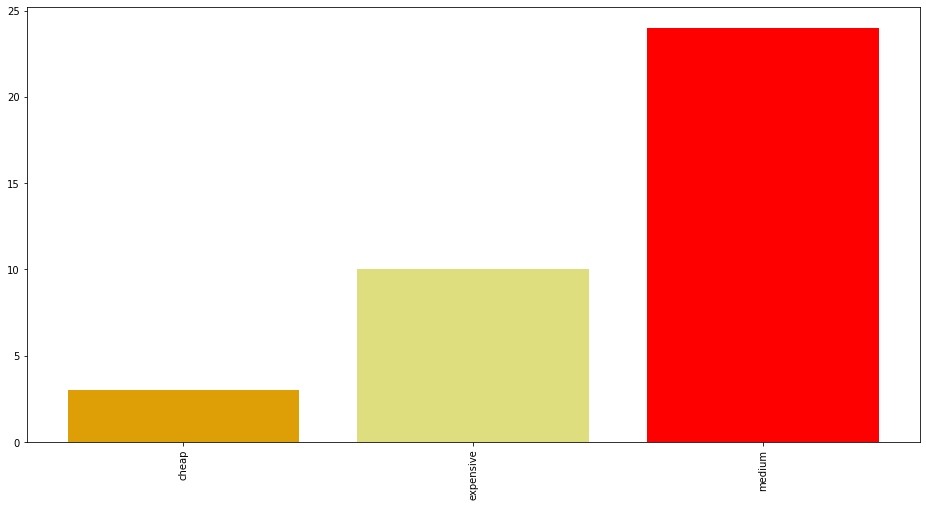

,number of restaurants
Average Price,
cheap,3
expensive,10
medium,24


<Figure size 1152x576 with 0 Axes>

In [319]:
t1 = comparison_df[comparison_df["number of restaurants"]<4]
t2=comparison_df[comparison_df["number of restaurants"]<11]
t3= comparison_df[comparison_df["number of restaurants"]>12]
plt.bar(t1.index.values, t1['number of restaurants'], color='tab:orange')
plt.bar(t2.index.values, t2['number of restaurants'], color='y', alpha= 0.5)
plt.bar(t3.index.values, t3['number of restaurants'], color='r')
plt.xticks(rotation = 90)
plt.show()
plt.savefig("Resources/comparison.png")
comparison_df

In [320]:
top_5_restaurants = result_df_2.sort_values(by="rating", ascending = False).head()

In [321]:
most_expensive_restaurants =result_df_2.sort_values(by="price", ascending = False).head()

In [322]:
top_5_restaurants

,name,price,cuisine,rating
67,Casablanca Moroccan kitchens,NaN,Moroccan,5.0
57,Marinate,1.0,Tacos,5.0
15,OSTE,NaN,Italian,5.0
84,Caribbean Soul Kitchen LA,NaN,Caribbean,5.0
13,Blasteran,2.0,American (New),5.0


In [323]:
most_expensive_restaurants

,name,price,cuisine,rating
108,Nobu Los Angeles,4.0,Japanese,4.0
20,Craig’s,3.0,American (New),4.0
17,Yardbird Table & Bar,3.0,Southern,4.5
52,Openaire,3.0,American (New),4.0
49,The Little Door,3.0,French,4.0
